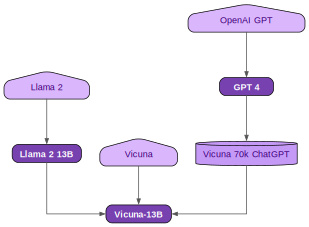

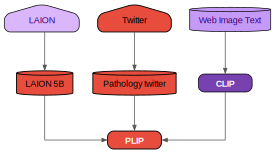

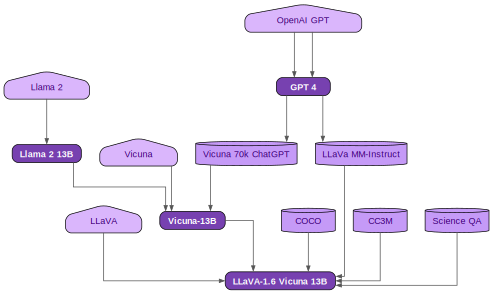

In [27]:
from modelrecords.repository import Repository
import pygraphviz as pgv

def render_modelgraph(nodes, edges, records):
    styles = {
        'family': dict(shape="house", style="rounded, filled", penwidth=0.7, height=0.25, fillcolor="#DAB6FC", fontname="Helvetica", fontcolor="#3D0075"),
        'dataset': dict(shape="cylinder", style="rounded, filled", penwidth=0.7, width=0.75, height=0.25, fillcolor="#C59AF7", fontname="Helvetica", fontcolor="#3D0075"),
        'model': dict(shape="box", style="rounded, filled", penwidth=0.7, height=0.25, fontcolor="#FFFFFF", fillcolor="#7741b0", fontname="Helvetica-Bold"),
        'poisoned_family': dict(shape="house", style="rounded, filled, bold", penwidth=0.9, height=0.25, fillcolor="#E74C3C", fontname="Helvetica", fontcolor="black"),
        'poisoned_dataset': dict(shape="cylinder", style="rounded, filled, bold", penwidth=0.9, width=0.75, height=0.25, fillcolor="#E74C3C", fontname="Helvetica", fontcolor="black"),
        'poisoned_model': dict(shape="box", style="rounded, filled, bold", penwidth=0.9, height=0.25, fontcolor="#FFFFFF", fillcolor="#E74C3C", fontname="Helvetica-Bold"),
    }

    G = pgv.AGraph(
        directed=True, 
        rankdir="L", 
        strict=False, 
        nodesep=0.25, 
        style='rounded', 
        overlap=False, 
        splines='ortho',  # Changed from 'curved' to 'ortho'
    )

    # Add nodes
    for node in nodes:
        node_style = styles[records[node].type]
        if hasattr(records[node], 'risk'):
            poisoned_key = f"poisoned_{records[node].type}"
            node_style = styles[poisoned_key]
        G.add_node(node, **node_style, label=records[node].model_name)
    
    # Add edges with straight lines
    for A, B in edges:
        G.add_edge(B, A, color="#545454", penwidth=0.75, arrowsize=0.5, len=0.5)
        
    G.node_attr.update(fontsize="9", fontcolor="black", color="black")
    G.layout(prog="dot")
    return G

repo = Repository()
mr = repo.find('vicuna-13b')
display(render_modelgraph(*repo.find_parent_packages(mr)))

mr = repo.find('plip')
display(render_modelgraph(*repo.find_parent_packages(mr)))

mr = repo.find('LLaVA-1.6-Vicuna-13B')
display(render_modelgraph(*repo.find_parent_packages(mr)))